<a href="https://colab.research.google.com/github/tiffcmw/Maker-Portfolio/blob/main/Financial-Notes-Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(please don't click or attempt to enter edit mode in the text box below. It has an extremely long string of image tokenization and could significanlty slow down the runtime responsiveness)

# Introduction

HI!!! Welcome! I thought I'll include this little fun exercise as a fresh addition, because its finance and one of my earliest programs as a developer! .Revisiting the code so much time later allowed me to reflect on what I can improve on, which I did, at the bottom.


I wrote this during my internship at an investment bank. This internship solidified my decision into not going into finance, I wasn't so sure about it in the first place anyways. But now I found my place in AI and CS stuff so I'm happy!


---


So *backstory* about this code: I spent lots of hours reading legal contracts and supplementary documents concerning the trade of financial notes. They're like hefty documents that are hundreds of pages.

I always noticed a section in the contracts where they detailed the mathematical process of prodcuct valuation. The parameters are usuallly listed in the contract, with the values detailed in a succinct, bullet point manner in the pricing supplement.

So I wondered, how do they actually do these calculations? I thought they must've had some program or database to handle these data, since these calculations are done many times everyday with the amount of transactions they handle. I was proven entirely wrong, when I was sent an excel document which my mentor noted is they way they do the calculations. Okay I mean at least they use excel formulas, so there is some automoation, but values are usualy scattered around different areas and involves many manual side calculations at the bottom of the sheet, and the process differs between different products so the formulas have the adjusted all the time... My mentor only gave me the spreadsheet as practice, and I'm definetely not one to critique a financial conglomerate, but I definetely see a way to streamline the process better.
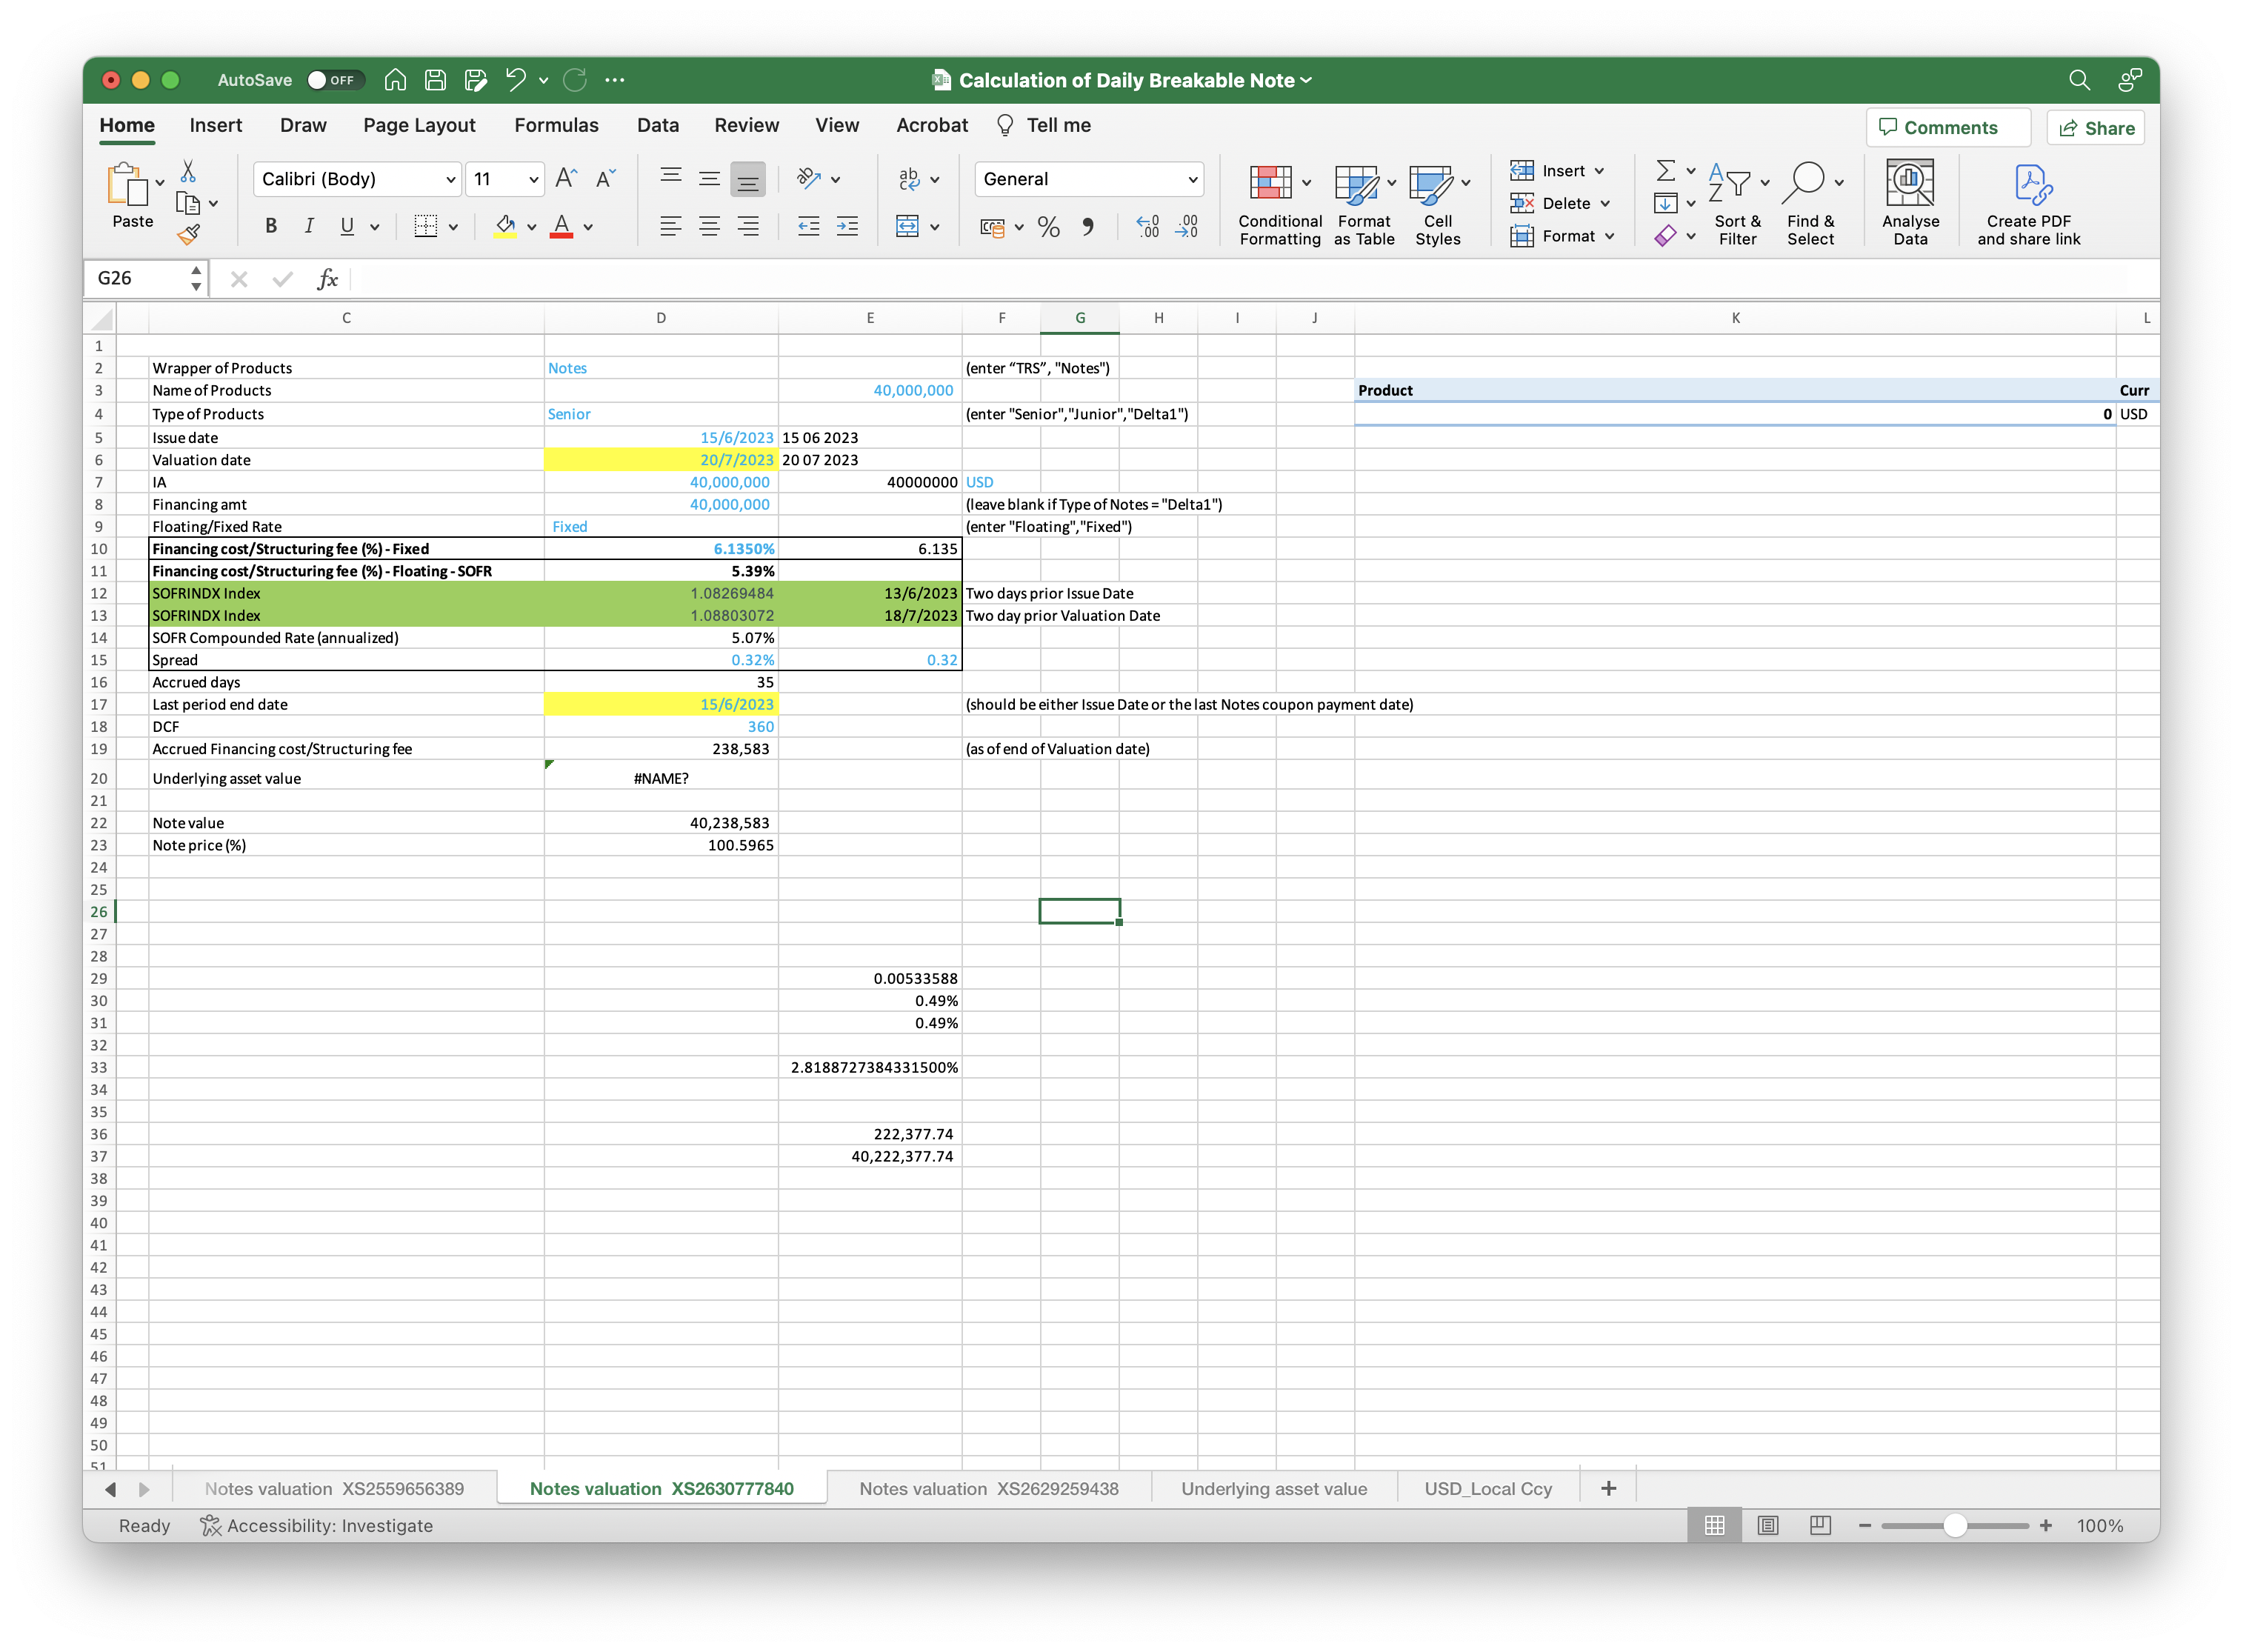
So during the afternaon, as my mentor went into a meeting and abandoned me with no work (I finished reading the legal contract he assigned me to read earlier than expected, I did reread it), I decided to make a program for the calculations, which allows the user to input the paramters required for the valuation in one sitting and get all the final values required for the pricing supplement. No manual calculation required.

I had a pretty good idea with how the calculation worked, which I built upon using the Excel sheet fomrulas and workflow. I then started coding! After a few hours, I finished the program before I clocked out for the day.



---


For your information, I made this a long time ago so I apologise for not being able to articulate my thought process.

**I didn't use any reference or source code, other than the imported packages, and one api for collecting index data.**

Shortcoming: They use an index in the calculation that is only produced during business days, so if either two days before issue or valuation date is a business day (they don't use the actual day, they use two days prior), the code won't work. In real life, they would likely use the value of days before or after such dates, but I am not sure, hence that fallback mechanism is not included. I should've clarified with my mentor and improved on the code though.

The writing style of the code is also quite elementary. I had only just started learning how to code at that time and this was a practice. !

In [ ]:
# this is actual data from a real transaction, i took it to cross check the calculation from an actual contract that i don't have access to anymore
# paste the values in for input to check out the program :)

#  Wrapper of Products         Notes (info)
#  Name of Products            ssfjk (info)
#  Type of Products           Senior (variable)
#  Issue Date             15 06 2023 (PLEASE make sure two days before this date is a business day, orelse the code won't work I'm sorry) (variable)
#  Valuation Date         23 06 2023 (this too) (variable)
#  Initial Amount         40000000.0 (variable)
#  Financing Amount       40000000.0 (variable)
#  Financing Rate              Fixed (variable)
#  Fixed Financing Cost        6.135 (variable)
#  Currency                      USD (info)
#  Spread                       0.32 (variable)
#  Day Count Fraction            360 (variable)
#  Underlying Asset Value          0 (variable)

In [1]:
#@title Original Code
import requests
import json
import csv
import pandas as pd

# taking in all the input
# wrapper of products and name is just for information, not a variable in the calculation. Only type is a variable.
wrapper_of_products = input("Wrapper of Products: (TRS or Notes) ") # info
name_of_product = input("Name of product: ") # info
type_of_product = input("Type of product: (Senior, Junior, or Delta1) ") # variable

issue_date_day, issue_date_month, issue_date_year = input("Issue Date: (DD MM YYYY) ").split()

# the valuation uses an index called SOFR Averages (it measures the cost of borrowing cash overnight).
# I don't remember why, but the value used is the one two days before the issue date.
issue_date_day_sofrai = int(issue_date_day) - 2
issue_date_day_sofrai = str(issue_date_day_sofrai)
# if the issue day - 2 is not a business day, I wasn't sure what they would actually do, I think it depends on the circumstance

valuation_date_day, valuation_date_month, valuation_date_year = input("Valuation Date: (DD MM YYYY) ").split()
valuation_date_day_sofrai = int(valuation_date_day) - 2
valuation_date_day_sofrai = str(valuation_date_day_sofrai)
# same thing for if valuation day - 2 is not a business day. no fallback mechanism

# formatting the date for the sofr api input
issue_date = issue_date_year + "-" + issue_date_month + "-" + issue_date_day
valuation_date = issue_date_year + "-" + issue_date_month + "-" + valuation_date_day
sofrai_url_issue_date = issue_date_year + "-" + issue_date_month + "-" + issue_date_day_sofrai
sofrai_url_valuation_date = valuation_date_year + "-" + valuation_date_month + "-" + valuation_date_day_sofrai

# a bit more input (unrelated to softr)
IA = input("Initial Amount: ")
IA = float(IA)
financing_amount = input("Financing Amount: (input null if type of product is Delta1) ")
financing_amount = float(financing_amount)

financing_rate = input("Financing Rate: (Fixed, Floating) ")

# if floating rate is fixed ask for the value
if financing_rate == 'Fixed':
    fixed_financing_costs = input("Fixed Financing Costs: (%) ")
    fixed_financing_costs = float(fixed_financing_costs)

# currency is also just an info
currency = input("Currency: ")

spread_margin = input("Spread/Margin: (% per annum) ")
spread_margin = float(spread_margin)

# getting the sofr rate using nyf api
# https://markets.newyorkfed.org/static/docs/markets-api.html#/Reference%20Rates

sofrai_url_issue = "https://markets.newyorkfed.org/api/rates/all/search.json?startDate=" + sofrai_url_issue_date + "&endDate=" + sofrai_url_issue_date + "&type=rate"
sofrai_url_valuation = "https://markets.newyorkfed.org/api/rates/all/search.json?startDate=" + sofrai_url_valuation_date + "&endDate=" + sofrai_url_valuation_date + "&type=rate"

# the responses are dict(list(dict))), dict inside a list inside a dict
response_api_issue = requests.get(sofrai_url_issue).json()
response_api_valuation = requests.get(sofrai_url_valuation).json()

# extracting the sofrai index from the response, because it includes other rates, see from the nyf example response if you'd like
softrai_issue = response_api_issue['refRates'][5]['index']
softrai_valuation = response_api_valuation['refRates'][5]['index']

print("SOFR Index(0) is: ", softrai_issue)
print("SOFR Index(T) is: ", softrai_valuation)

# calculating the sofr compounded rate (annulaized)
import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# making the date variables strings for ease of use
issue_date_year = int(issue_date_year)
issue_date_month = int(issue_date_month)
issue_date_day_sofrai = int(issue_date_day_sofrai)
valuation_date_year = int(valuation_date_year)
valuation_date_month = int(valuation_date_month)
valuation_date_day_sofrai = int(valuation_date_day_sofrai)

# defining the datetime dates
sofr_issue_date_datetime = datetime(issue_date_year, issue_date_month, issue_date_day_sofrai)
sofr_valuation_date_datetime = datetime(valuation_date_year, valuation_date_month, valuation_date_day_sofrai)

difference_in_sofr_dates = sofr_valuation_date_datetime - sofr_issue_date_datetime
difference_in_sofr_dates = str(difference_in_sofr_dates)

# sepereate the worded result of the difference
difference_in_sofr_dates = difference_in_sofr_dates.split(" ", 2)

# from the word seperated list, choose the
difference_in_sofr_dates = difference_in_sofr_dates[0]

# turning the string value from the list into an integer
difference_in_sofr_dates = int(difference_in_sofr_dates)

# I APOLOGISE FOR WHATEVER IS ABOVE ITS SO FUNNY LMFAOOOO

print("Accrued days: ", difference_in_sofr_dates)

sofr_compounded_rate = (((softrai_valuation/softrai_issue) - 1) * 360) / difference_in_sofr_dates * 100

# round the sofr compounded rate to two decimal places
sofr_compounded_rate = round(sofr_compounded_rate, 2)

print("Sofr compounded rate is: ", sofr_compounded_rate, "%")

floating_financing_costs = sofr_compounded_rate + spread_margin

floating_financing_costs = round(floating_financing_costs, 2)

print("Floating Financing Costs: ", floating_financing_costs, "%")

floating_financing_costs = float(floating_financing_costs)
# assumption: last period end date is always equal to the issue date
last_period_end_date = issue_date

# calculating the accrued financial cost
day_count_fraction = input("Day Count Fraction DCF: ")
day_count_fraction = int(day_count_fraction)

accrued_days = difference_in_sofr_dates

if type_of_product == 'Delta1':
    if financing_rate == 'Fixed':
        accrued_financing_costs = IA * fixed_financing_costs / 100 * accrued_days / day_count_fraction
    elif financing_rate == 'Floating':
        accrued_financing_costs = IA * floating_financing_costs / 100 * accrued_days / day_count_fraction

if type_of_product != 'Delta1':
    if financing_rate == 'Fixed':
        accrued_financing_costs = financing_amount * fixed_financing_costs / 100 * accrued_days / day_count_fraction
    elif financing_rate == 'Floating':
        accrued_financing_costs = financing_amount * floating_financing_costs / 100 * accrued_days / day_count_fraction

# round the financing cost to nearest int
accrued_financing_costs = round(accrued_financing_costs)

print("Accured financing costs: ", accrued_financing_costs)

underlying_asset_value = input("Underlying Asset Value: (input 0 if none) ")

# calculating the note value
if type_of_product == 'Senior':
    note_value = accrued_financing_costs + IA
elif type_of_product == 'Junior':
    note_value = underlying_asset_value - financing_amount - accrued_financing_costs
elif type_of_product == 'Delta1':
    note_value = underlying_asset_value - accrued_financing_costs

note_value = round(note_value)
print("Note Value: ", note_value)

note_price = round(note_value / IA * 100, 4)

Wrapper of Products: (TRS or Notes) Notes
Name of product: dslkfjs
Type of product: (Senior, Junior, or Delta1) Senior
Issue Date: (DD MM YYYY) 15 06 2023
Valuation Date: (DD MM YYYY) 23 06 2023
Initial Amount: 40000000
Financing Amount: (input null if type of product is Delta1) 40000000
Financing Rate: (Fixed, Floating) Fixed
Fixed Financing Costs: (%) 6.135
Currency: USD
Spread/Margin: (% per annum) 0.32
SOFR Index(0) is:  1.08269484
SOFR Index(T) is:  1.08391064
Accrued days:  8
Sofr compounded rate is:  5.05 %
Floating Financing Costs:  5.37 %
Day Count Fraction DCF: 360
Accured financing costs:  54533
Underlying Asset Value: (input 0 if none) 0
Note Value:  40054533


In [2]:
#@title Creating the dataframe
# I want to present the data better, I have OCD

import numpy as np
import pandas as pd

data_dict = {
    'Categories' : [
        'Wrapper of Products',
        'Name of Products',
        'Type of Products',
        'Issue Date',
        'Valuation Date',
        'Initial Amount',
        'Financing Amount',
        'Financing Rate',
        'SOFRINDX Index two days prior Issue Date',
        'SOFRINDX Index two days prior Valuation Date',
        'SOFRINDX Compounded Rate (Annualized)',
        'Spread',
        'Fixed Financing Cost',
        'Floating Financing Cost (SOFR)',
        'Accrued Days',
        'Last Period End Date',
        'Day Count Fraction',
        'Underlying Asset Value',
        'Note Value',
        'Note Price %',
        'Curr',
        'Notes Px',
        'Initial Amt',
        'Notes Value'],

    'Values' : [
        wrapper_of_products,
        name_of_product,
        type_of_product,
        issue_date,
        valuation_date,
        IA,
        financing_amount,
        financing_rate,
        softrai_issue,
        softrai_valuation,
        sofr_compounded_rate,
        spread_margin,
        fixed_financing_costs,
        floating_financing_costs,
        accrued_days,
        last_period_end_date,
        day_count_fraction,
        underlying_asset_value,
        note_value,
        note_price,
        currency,
        note_price,
        IA,
        note_value]
    }

df = pd.DataFrame(data_dict)

display(df)

,Categories,Values
0,Wrapper of Products,Notes
1,Name of Products,dslkfjs
2,Type of Products,Senior
3,Issue Date,2023-06-15
4,Valuation Date,2023-06-23
5,Initial Amount,40000000.0
6,Financing Amount,40000000.0
7,Financing Rate,Fixed
8,SOFRINDX Index two days prior Issue Date,1.082695
9,SOFRINDX Index two days prior Valuation Date,1.083911


In hindsight, the code itself is not too complex. For a new programmer like me back then, the learning experience is as follows:

* learning how to manage many variables
* learning how different datatypes interact
* learning how to use APIs
* learning how to access, manipulate, and create dictionaries
* learning how to create a workflow

It is my first project where it is some kind of real world application, finance no less, so I thought it would be interesting to share. But now there are definetely many points for improvements:

* using functions (to streamline the process for calculating softrai dates, their numerical differences (the datetime lib makes it not onestep), financing costs)
* error handling (in cases where users input the wrong format, or suggest reasons for potential runtime errors)
* business day handling (should make a step to correct the date into the closest business day)
* and just the writing style in general, more clear


In [ ]:
# this is actual data from a real transaction, i took it to cross check the calculation from an actual contract that i don't have access to anymore
# paste the values in for input to check out the program :)

#  Wrapper of Products         Notes (info)
#  Name of Products            ssfjk (info)
#  Type of Products           Senior (variable)
#  Issue Date             15 06 2023 (PLEASE make sure two days before this date is a business day, orelse the code won't work I'm sorry) (variable)
#  Valuation Date         23 06 2023 (this too) (variable)
#  Initial Amount         40000000.0 (variable)
#  Financing Amount       40000000.0 (variable)
#  Financing Rate              Fixed (variable)
#  Fixed Financing Cost        6.135 (variable)
#  Currency                      USD (info)
#  Spread                       0.32 (variable)
#  Day Count Fraction            360 (variable)
#  Underlying Asset Value          0 (variable)

In [1]:
# hi! if you want to test out the code below,
# you may not have the workalendar pacakge. (download it here)
# It contains info about the working days,
# so it can be used to check if the data is a working day

!pip install workalendar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=37e96d6b8fa0096a64e730b6bcd0d25bd632c3fac6d8dcca04739d0284afe7e6
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built pymeeus


In [16]:
#@title Improved Code

import requests
from datetime import datetime
from workalendar.usa import NewYork #to use the NewYork calendar and their business days
import pandas as pd

def input_date(prompt):
    # infinite loop to prompt for a date input until valid date entered
    while True:
        try:
            #prompts for a date input
            date_input = input(prompt)
            # splits the date input into day, month, and year
            day, month, year = map(int, date_input.split())
            return datetime(year, month, day)
        # if the date input is invalid, cannot be parsed, prints an error message
        except ValueError:
            print("Please enter the date in DD MM YYYY format.")

def adjust_to_business_day(date):
    # initialize the NewYork as cal
    cal = NewYork()
    # if the date is not a business day, subtract one day until it is a business day
    while not cal.is_working_day(date):
        date -= pd.Timedelta(days=1)
    return date

def get_sofr_rate(date):
    # formats the date to the format that the API accepts
    formatted_date = date.strftime("%Y-%m-%d")
    url = f"https://markets.newyorkfed.org/api/rates/all/search.json?startDate={formatted_date}&endDate={formatted_date}&type=rate"
    response = requests.get(url).json()
    # gets the SOFR rate from the response
    sofr_rate = response['refRates'][5]['index']
    return sofr_rate

def calculate_financing_costs(financing_amount, financing_rate, days, day_count_fraction, fixed_financing_costs=None, floating_financing_costs=None):
    # I actually don't know if it's possible for the financing cost to be 0 if financing rate is fixed, but I'm just gonna still check it anyways
    # floating finance rate should not be 0 unless the spread margin is also 0
    if financing_rate == 'Fixed' and fixed_financing_costs is not None:
        return financing_amount * fixed_financing_costs / 100 * days / day_count_fraction
    elif financing_rate == 'Floating' and floating_financing_costs is not None:
        return financing_amount * floating_financing_costs / 100 * days / day_count_fraction
    else:
        return 0

def main():
    # most of these are the same
    wrapper_of_products = input("Wrapper of Products: (TRS or Notes) ")
    name_of_product = input("Name of product: ")
    type_of_product = input("Type of product: (Senior, Junior, or Delta1) ")

    # passed to the input_date function
    issue_date = input_date("Issue Date: (DD MM YYYY) ")
    valuation_date = input_date("Valuation Date: (DD MM YYYY) ")

    # passed to adjust_to_business_day function
    issue_date_adjusted = adjust_to_business_day(issue_date - pd.Timedelta(days=2))
    valuation_date_adjusted = adjust_to_business_day(valuation_date - pd.Timedelta(days=2))

    IA = float(input("Initial Amount: "))

    # Delta1 type of product does not have a financing amount, so it will be automatically None, doesn't ask for an input
    financing_amount = None if type_of_product == 'Delta1' else float(input("Financing Amount: "))
    financing_rate = input("Financing Rate: (Fixed, Floating) ")

    fixed_financing_costs = None
    if financing_rate == 'Fixed':
        fixed_financing_costs = float(input("Fixed Financing Costs: (%) "))

    currency = input("Currency: ")
    spread_margin = float(input("Spread/Margin: (% per annum) "))

    # passes to the get_softr_rate function
    sofr_rate_issue = get_sofr_rate(issue_date_adjusted)
    sofr_rate_valuation = get_sofr_rate(valuation_date_adjusted)

    print("SOFR Index(0) is: ", sofr_rate_issue)
    print("SOFR Index(T) is: ", sofr_rate_valuation)

    difference_in_days = (valuation_date_adjusted - issue_date_adjusted).days
    print("Accrued days: ", difference_in_days)

    sofr_compounded_rate = (((sofr_rate_valuation / sofr_rate_issue) - 1) * 360) / difference_in_days * 100
    sofr_compounded_rate = round(sofr_compounded_rate, 2)
    print("Sofr compounded rate is: ", sofr_compounded_rate, "%")

    floating_financing_costs = sofr_compounded_rate + spread_margin
    floating_financing_costs = round(floating_financing_costs, 2)
    print("Floating Financing Costs: ", floating_financing_costs, "%")

    day_count_fraction = int(input("Day Count Fraction DCF: "))
    accrued_days = difference_in_days

    # yes lots of parameters :) just using the values got from the inputs and main function, pass it to the calculate_financing_costs function
    accrued_financing_costs = calculate_financing_costs(
        # Initial amount is the financing amount for Delta1 type of product
        # The calculated financing_amount is the financing amount for Senior and Junior type of product
        financing_amount=IA if type_of_product == 'Delta1' else financing_amount,
        # plugging into parameters
        financing_rate=financing_rate,
        days=accrued_days,
        day_count_fraction=day_count_fraction,
        fixed_financing_costs=fixed_financing_costs,
        floating_financing_costs=floating_financing_costs
    )

    accrued_financing_costs = round(accrued_financing_costs)
    print("Accrued financing costs: ", accrued_financing_costs)

    underlying_asset_value = float(input("Underlying Asset Value: (input 0 if none) "))

    note_value = None
    if type_of_product == 'Senior':
        note_value = accrued_financing_costs + IA
    elif type_of_product == 'Junior':
        note_value = underlying_asset_value - financing_amount - accrued_financing_costs
    elif type_of_product == 'Delta1':
        note_value = underlying_asset_value * (IA + accrued_financing_costs)

    note_value = round(note_value, 2)
    print(f"Note value: ", note_value)

# the main function is called if this file is run directly as a module, not as a library
# name always indicate the name of the module. Imported packages will not have the same name as the file
if __name__ == "__main__":
    main()

# there is actually just 26 lines less, but hopefully this code is more readable
# they should produce the same result

Wrapper of Products: (TRS or Notes) Notes
Name of product: dslkfj
Type of product: (Senior, Junior, or Delta1) Senior
Issue Date: (DD MM YYYY) 15 06 2023
Valuation Date: (DD MM YYYY) 23 06 2023
Initial Amount: 40000000
Financing Amount: 40000000
Financing Rate: (Fixed, Floating) Fixed
Fixed Financing Costs: (%) 6.135
Currency: USD
Spread/Margin: (% per annum) 0.32
SOFR Index(0) is:  1.08269484
SOFR Index(T) is:  1.08391064
Accrued days:  8
Sofr compounded rate is:  5.05 %
Floating Financing Costs:  5.37 %
Day Count Fraction DCF: 360
Accrued financing costs:  54533
Underlying Asset Value: (input 0 if none) 0
Note value:  40054533.0


Obviously there could still be areas of improvement, but I think it is better than the original one!